SALES DATA ANALYSIS

In [59]:
!pip install seaborn

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors

CASE STUDY - 1 : SuperStore Sales Analysis

LOADING THE DATASET

In [62]:
df = pd.read_csv("C:/Users/91628/Downloads/archive/superstore.csv", encoding='ISO-8859-1')
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,è®°å½æ°,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [63]:
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'è®°å½æ°', 'Order.Date', 'Order.ID',
       'Order.Priority', 'Product.ID', 'Product.Name', 'Profit', 'Quantity',
       'Region', 'Row.ID', 'Sales', 'Segment', 'Ship.Date', 'Ship.Mode',
       'Shipping.Cost', 'State', 'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [64]:
df.shape

(51290, 27)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   è®°å½æ°       51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [66]:
df.isna().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
è®°å½æ°         0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [67]:
df.describe().round()

,Discount,è®°å½æ°,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,0.0,1.0,29.0,3.0,25646.0,246.0,26.0,2013.0,31.0
std,0.0,0.0,174.0,2.0,14806.0,488.0,57.0,1.0,14.0
min,0.0,1.0,-6600.0,1.0,1.0,0.0,0.0,2011.0,1.0
25%,0.0,1.0,0.0,2.0,12823.0,31.0,3.0,2012.0,20.0
50%,0.0,1.0,9.0,3.0,25646.0,85.0,8.0,2013.0,33.0
75%,0.0,1.0,37.0,5.0,38468.0,251.0,24.0,2014.0,44.0
max,1.0,1.0,8400.0,14.0,51290.0,22638.0,934.0,2014.0,53.0


 EXPLORATORY DATA ANALYSIS
 1. WHAT IS THE OVERALL SALES TREND?

In [68]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'], errors='coerce')
df['Month_Year'] = df['Order.Date'].apply(lambda x: x.strftime('%Y-%m') if pd.notnull(x) else None)
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,è®°å½æ°,Order.Date,Order.ID,...,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,Month_Year
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07,CA-2011-130813,...,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2,2011-01
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21,CA-2011-148614,...,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4,2011-01
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32,2011-08
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05,CA-2011-118962,...,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32,2011-08
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29,CA-2011-146969,...,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40,2011-09


In [69]:
print(df['Month_Year'].unique())
print(df['Month_Year'].dtype)

['2011-01' '2011-08' '2011-09' '2011-10' '2011-11' '2011-12' '2012-02'
 '2012-03' '2012-04' '2012-06' '2012-08' '2012-11' '2012-12' '2013-03'
 '2013-04' '2013-05' '2013-06' '2013-07' '2013-08' '2013-09' '2013-10'
 '2013-11' '2014-01' '2014-02' '2014-04' '2014-05' '2014-06' '2014-07'
 '2014-08' '2014-09' '2014-10' '2014-11' '2014-12' '2011-02' '2011-04'
 '2011-05' '2011-07' '2012-05' '2012-09' '2013-01' '2013-02' '2013-12'
 '2011-06' '2014-03' '2011-03' '2012-10' '2012-01' '2012-07']
object


In [70]:
df_temp = df.groupby('Month_Year')['Sales'].sum().reset_index()
df_temp.head()

,Month_Year,Sales
0,2011-01,98902
1,2011-02,91152
2,2011-03,145726
3,2011-04,116927
4,2011-05,146762


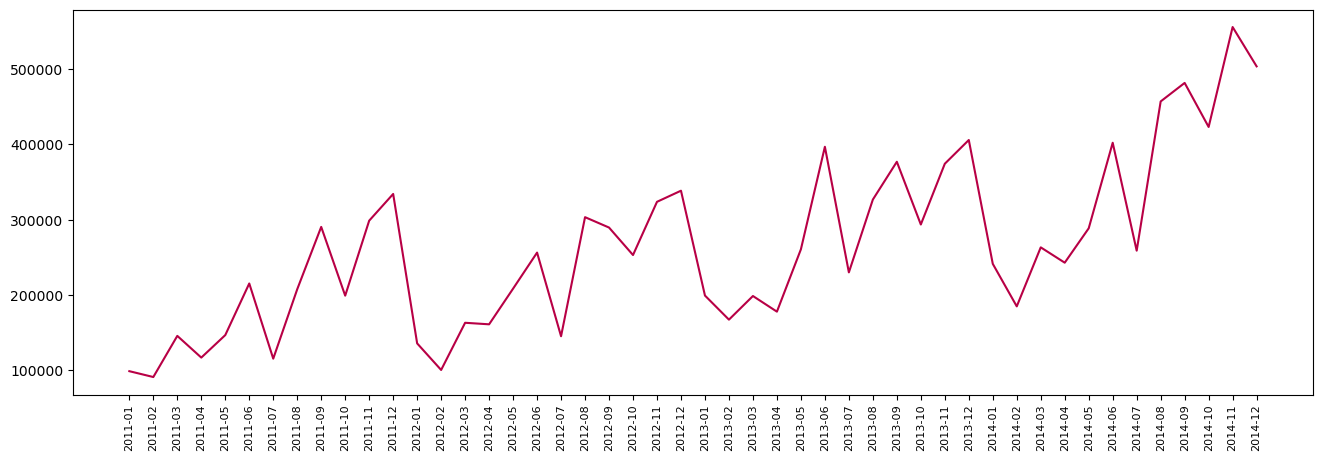

In [71]:
plt.figure(figsize=(16, 5))
plt.plot(df_temp['Month_Year'], df_temp['Sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

                                                           • Highest Sales in the month of November in 2014

 2. SALES BY CATEGORY

In [72]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
fig = px.pie(
    sales_by_category,
    values='Sales',
    names='Category',
    hole=0.5,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_text='Sales Analysis by Category',
    title_font=dict(size=24)
)

fig.show()

                                                                • Technology has highest sale.

3. SALES BY SUB CATEGORY

In [73]:
sales_by_subcategory = df.groupby('Sub.Category')['Sales'].sum().reset_index()
fig = px.bar(sales_by_subcategory,
x='Sub.Category',
y='Sales',
title='Sales Analysis by Sub-Category')
fig.show()

                                                    • Phones has highest sales with copiers succeeding next.

 4. MONTHLY PROFITS

In [74]:
profit_by_month = df.groupby('Month_Year')['Profit'].sum().reset_index()
fig = px.line(profit_by_month, x='Month_Year', y='Profit', title='Monthly Profit Analysis')
fig.show()

 5. PROFIT BY CATEGORY

In [75]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
fig = px.pie(
    profit_by_category,
    values='Profit',
    names='Category',
    hole=0.5,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_text='Profit Analysis by Category',
    title_font=dict(size=24)
)

fig.show()

                                                                Technology has the maximum profit

6. PROFIT BY SUB-CATEGORY

In [76]:
profit_by_subcategory = df.groupby('Sub.Category')['Profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, x='Sub.Category',y='Profit',
                       title='Profit Analysis by Sub-Category')
fig.show()

                                                                        • Copiers has highest profit.

7. PROFIT ANALYSIS BY CUSTOMER SEGMENTS

In [77]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
color_palette = px.colors.qualitative.Pastel
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sales_profit_by_segment['Segment'],
    y=sales_profit_by_segment['Sales'],
    name='Sales',
    marker_color=color_palette[0]
))

fig.add_trace(go.Bar(
    x=sales_profit_by_segment['Segment'],
    y=sales_profit_by_segment['Profit'],
    name='Profit',
    marker_color=color_palette[1]
))

fig.update_layout(
    title='Sales and Profit Analysis by Customer Segment',
    xaxis_title='Customer Segment',
    yaxis_title='Amount'
)

fig.show()

8. SALES TO PROFIT RATIO

In [78]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.686326
1    Corporate               8.668939
2  Home Office               8.338915


 • The store has higher profits from the product sales for consumers.

9. WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [79]:
prod_sales = pd.DataFrame(df.groupby('Product.Name')['Sales'].sum())
prod_sales.sort_values(by=['Sales'], inplace=True, ascending=False)
prod_sales[:10]

,Sales
Product.Name,
"Apple Smart Phone, Full Size",86936
"Cisco Smart Phone, Full Size",76441
"Motorola Smart Phone, Full Size",73159
"Nokia Smart Phone, Full Size",71904
Canon imageCLASS 2200 Advanced Copier,61600
"Hon Executive Leather Armchair, Adjustable",58200
"Office Star Executive Leather Armchair, Adjustable",50667
"Harbour Creations Executive Leather Armchair, Adjustable",50120
"Samsung Smart Phone, Cordless",48654


                                                        • Apple Smart Phone is the top product by sale.

10. WHICH ARE THE MOST SELLING PRODUCTS?

In [80]:
best_selling_prods = pd.DataFrame(df.groupby('Product.ID')['Quantity'].sum())
best_selling_prods.sort_values(by=['Quantity'], inplace=True, ascending=False)
best_selling_prods[:10]

,Quantity
Product.ID,
OFF-AR-10003651,163
OFF-BI-10002799,130
OFF-AR-10003829,117
OFF-BI-10001808,112
OFF-BI-10003708,111
FUR-CH-10003354,106
OFF-BI-10002570,102
OFF-AR-10000110,97
OFF-BI-10004195,92


• Staples is the best selling product.

11. WHAT IS THE MOST PREFERRED SHIP MODE?

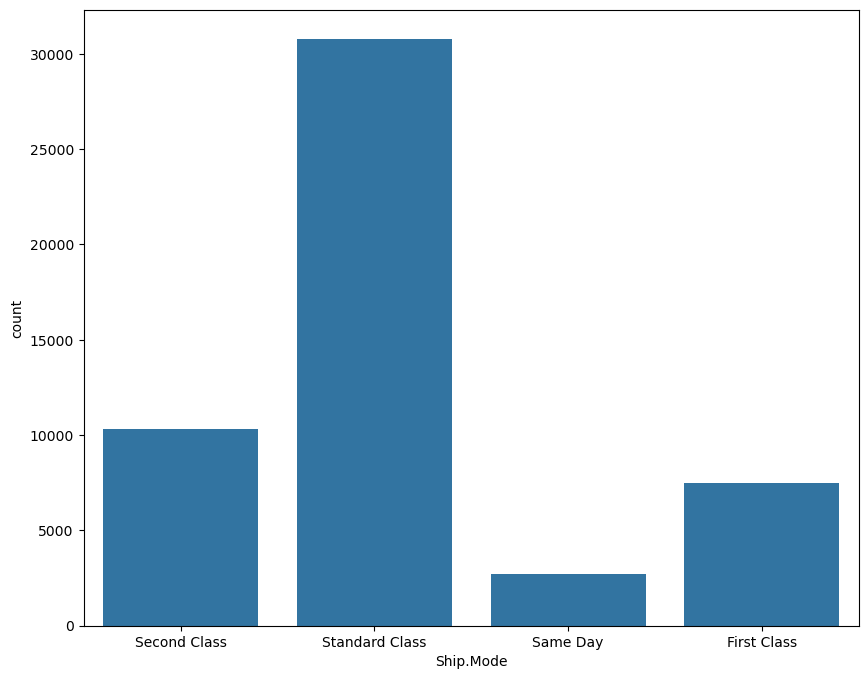

In [81]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Ship.Mode', data=df)
plt.show()

                                                            • standard class is the most preferred ship mode.

12. WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [83]:
cat_subcat = pd.DataFrame(df.groupby(['Category', 'Sub.Category'])['Profit'].sum())
cat_subcat.sort_values(['Category','Profit'], ascending=False)

Profit
Category        Sub.Category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        140396.26750
                Furnishings    46967.42550
                Tables        -64083.38870

CASE STUDY 2 : To analyze and answer business questions about 12 months
 worth of sales data.

 The data contains hundreds of thousands of electronics store purchases broken down by month,
 product type, cost, purchase address, etc.

In [ ]:
all_data = pd.read_csv("C:/Users/91628/Downloads/archive_2/Updated_sales.csv", encoding='utf-8')
print("CSV file successfully loaded.")

CSV file successfully loaded.


In [ ]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
all_data.shape

(30394, 6)

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_data = all_data.dropna()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30246 entries, 0 to 30393
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          30246 non-null  object
 1   Product           30246 non-null  object
 2   Quantity Ordered  30246 non-null  object
 3   Price Each        30246 non-null  object
 4   Order Date        30246 non-null  object
 5   Purchase Address  30246 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [ ]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,30246,30246,30246,30246,30246,30246
unique,29018,19,8,23,23315,27853
top,178158,Lightning Charging Cable,1,14.95,04/02/19 13:24,"821 Elm St, Austin, TX 73301"
freq,4,3556,27405,3556,7,4


In [ ]:
cat_subcat = df.groupby(['Category', 'Sub.Category'])['Profit'].sum().reset_index()
cat_subcat = cat_subcat.sort_values(['Category', 'Profit'], ascending=False)
cat_subcat

,Category,Sub.Category,Profit
14,Technology,Copiers,258567.54818
16,Technology,Phones,216717.00580
13,Technology,Accessories,129626.30620
15,Technology,Machines,58867.87300
4,Office Supplies,Appliances,141680.58940
11,Office Supplies,Storage,108461.48980
6,Office Supplies,Binders,72449.84600
10,Office Supplies,Paper,59207.68270
5,Office Supplies,Art,57953.91090
7,Office Supplies,Envelopes,29601.11630


In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

C:\Users\91628\AppData\Local\Temp\ipykernel_21692\3704723626.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
def get_city(address):
 return address.split(",")[1].strip(" ")
def get_state(address):
 return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


Question 1: What was the best month for sales? How much was earned that month?

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [ ]:
monthly_sales = all_data.groupby('Month').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'sum',
    'Sales': 'sum'
})

 Question 1: What city sold the most product?

In [ ]:
city_sales = all_data.groupby('City').agg({'Quantity Ordered': 'sum', 'Price Each': 'sum', 'Sales': 'sum'})
city_sales.head()

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),2686,451323.17,453722.58
Austin (TX),1827,296633.65,298397.20
Boston (MA),3599,589675.38,594155.41
Dallas (TX),2621,430647.33,432603.93
Los Angeles (CA),5471,891861.82,896860.73


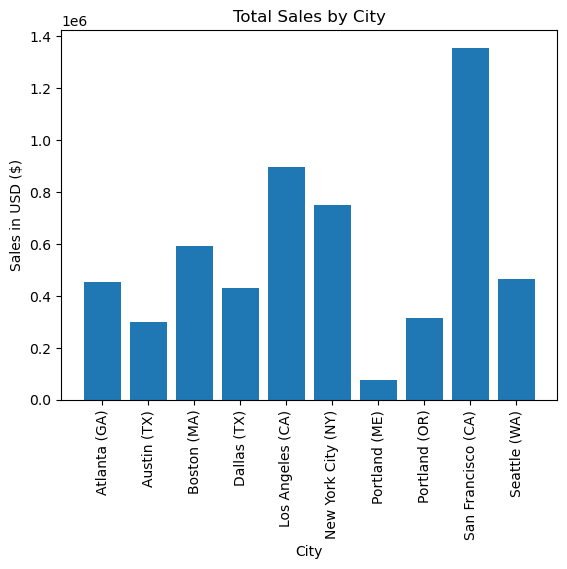

In [ ]:
city_sales = all_data.groupby('City')['Sales'].sum()
plt.bar(city_sales.index, city_sales.values)
plt.xticks(rotation=90)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.title('Total Sales by City')
plt.show()

 • San Francisco has highest sales.

 Question 2: What time should we display advertisements to maximize likelihood of customer’s
 buying product?

In [ ]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

C:\Users\91628\AppData\Local\Temp\ipykernel_21692\3533922935.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\91628\AppData\Local\Temp\ipykernel_21692\3533922935.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


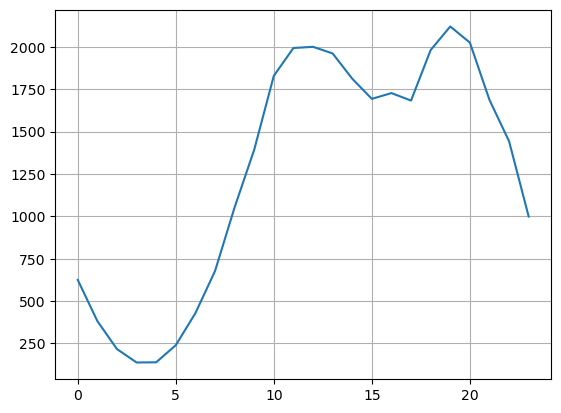

In [ ]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]
plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.grid()
plt.show()

There are approximately 2 peaks at the data. They are 12 (12 PM) and 19 (7 PM). It makes sense
 since most people shop during the day. From this data, It can suggest to advertise their product
 right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.

 Question 3: What products are most often sold together?

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [ ]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\91628\AppData\Local\Temp\ipykernel_21692\2957988009.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df2['Grouped']:
 row_list = row.split(',')
 count.update(Counter(combinations(row_list, 2)))
for key,value in count.most_common(10):
 print(key, value)

('iPhone', 'Lightning Charging Cable') 172
('Google Phone', 'USB-C Charging Cable') 167
('iPhone', 'Wired Headphones') 65
('Google Phone', 'Wired Headphones') 64
('iPhone', 'Apple Airpods Headphones') 63
('Vareebadd Phone', 'USB-C Charging Cable') 58
('Google Phone', 'Bose SoundSport Headphones') 36
('USB-C Charging Cable', 'Wired Headphones') 23
('Vareebadd Phone', 'Wired Headphones') 22
('Vareebadd Phone', 'Bose SoundSport Headphones') 17


• The most often products sold together are iPhone and Lightning Charging Cable with 1005
 transactions.

Question 4: What product sold the most?

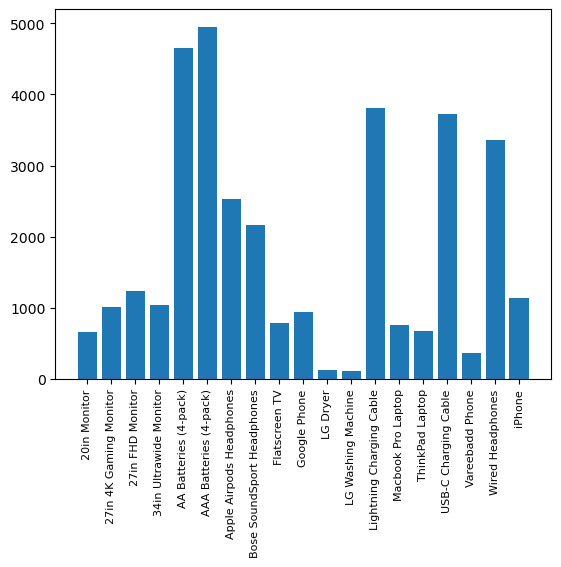

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

• AAA batteries sold the most.